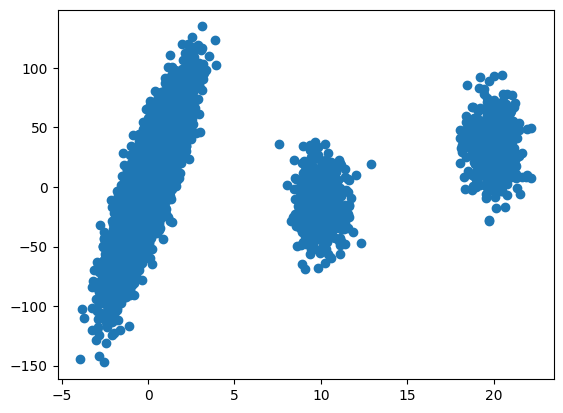

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

N_SAMPLES = 10000
N_OUTLIERS = 500

X, y, coef = datasets.make_regression(
	n_samples=N_SAMPLES,
	n_features=1,
	n_informative=1,
	noise=20,
	coef=True,
	random_state=42
)
coef_list = [["original_coef", float(coef)]]

# add outliers
np.random.seed(42)
X[:N_OUTLIERS] = 10 + 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
y[:N_OUTLIERS] = -15 + 20 * np.random.normal(size=N_OUTLIERS)

X[-N_OUTLIERS:] = 20 - 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
y[-N_OUTLIERS:] = 35 - 20 * np.random.normal(size=N_OUTLIERS)

plt.scatter(X, y);

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

28.27344604947067
1255.8062168229303


In [ ]:
import tensorflow as tf

normalizer = tf.keras.layers.Normalization(input_shape=[500,1], axis=None)
normalizer.adapt(X)

In [ ]:
class CustomMAELoss(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()
    def call(self, y_true, y_pred):
        element_wise = tf.math.abs(tf.math.subtract(y_true, y_pred))
        return tf.reduce_mean(tf.reduce_sum(element_wise,axis=1))

class CustomSMAELoss(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()
    def call(self, y_true, y_pred):
        element_wise = tf.math.multiply_no_nan(x=tf.math.subtract(y_true, y_pred), y=tf.math.tanh(tf.math.divide_no_nan(tf.math.subtract(y_true, y_pred), 2.0)))
        return tf.reduce_mean(tf.reduce_sum(element_wise,axis=1))

In [ ]:
def create_model():
  model = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(units=1)
  ])
  return model
mae = tf.keras.losses.MeanAbsoluteError()
mse = tf.keras.losses.MeanSquaredError()
losses = [CustomSMAELoss(), tf.keras.losses.MeanAbsoluteError(), tf.keras.losses.MeanSquaredError(), tf.keras.losses.Huber(), tf.keras.losses.LogCosh()]
names = ["SMAE","MAE","MSE","Huber","LogCosh"]
for i in range(len(losses)):
    tf.keras.backend.clear_session()
    loss_fn = losses[i]
    model = create_model()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss=loss_fn, metrics=[tf.keras.metrics.MeanAbsoluteError()])
    history = model.fit(X, y, epochs=100, verbose=0, validation_split = 0.2)
    print("Loss: {0}, MAE: {1}, MSE: {2}".format(names[i], mae(y, model.predict(X)).numpy(), mse(y, model.predict(X)).numpy()))

313/313 [==============================] - 1s 2ms/step
Loss: SMAE, MAE: 29.69865608215332, MSE: 1381.391845703125
313/313 [==============================] - 1s 2ms/step
Loss: MAE, MAE: 29.718461990356445, MSE: 1383.31103515625
313/313 [==============================] - 1s 2ms/step
Loss: MSE, MAE: 29.697200775146484, MSE: 1381.2545166015625
313/313 [==============================] - 1s 3ms/step
Loss: Huber, MAE: 29.71204376220703, MSE: 1382.682861328125
313/313 [==============================] - 1s 2ms/step
Loss: LogCosh, MAE: 29.718259811401367, MSE: 1383.291015625
